<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/main/Decision_Tree_GridSearch_CV_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [192]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Information
- Embarked implies where the traveler mounted from. There are three possible values for Embark Southampton, Cherbourg, and Queenstown.
- SibSp is the number of siblings or spouse of a person onboard
- Parch is the feature contained the number of parents or children each passenger was touring with.

# Checking number of passenger died

In [193]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [194]:
data.drop(['PassengerId', 'Name', "Ticket", "Cabin"], axis=1, inplace=True)

In [195]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Replacing for NULL values
- "Age" with the mean value of "Age"
- Drop the samples of embarked with null values

In [196]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [197]:
data.fillna(value={'Age': data['Age'].mean()}, inplace=True)

In [198]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [199]:
data.dropna(inplace=True)

In [200]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Creating Dummy Variables
- Dropping Female column, only male column can detect
- Dropping first column to avoid multicollinearity in embark

In [201]:
sex = pd.get_dummies(data['Sex'], drop_first=True,dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [202]:
embark = pd.get_dummies(data['Embarked'], drop_first=True,dtype=int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


# Adding Dummy Variables to original Data

In [203]:
data = pd.concat([data, sex, embark], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [204]:
data = data.drop(['Sex', 'Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extract Features and Labels

In [205]:
X = data.drop(['Survived'], axis = 1)
X.shape

(889, 8)

In [206]:
y = data['Survived']

# Performing train test Split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
X_test.shape

(178, 8)

# Standardize the data

In [209]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Tree

In [210]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [211]:
y_pred = dtree.predict(X_test)

In [212]:
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

Accuracy: 0.7584269662921348


# Confusion Matrixx

In [213]:
cm = confusion_matrix(y_test, y_pred)

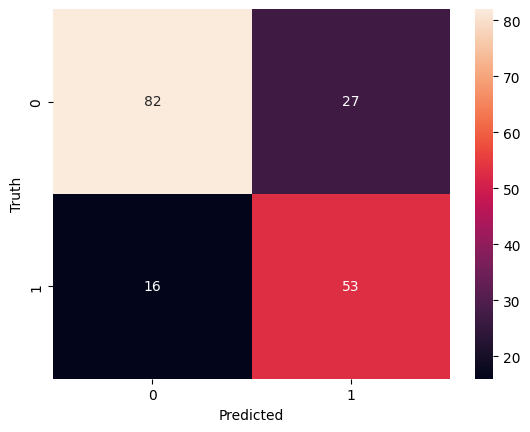

In [214]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Visualize the tree

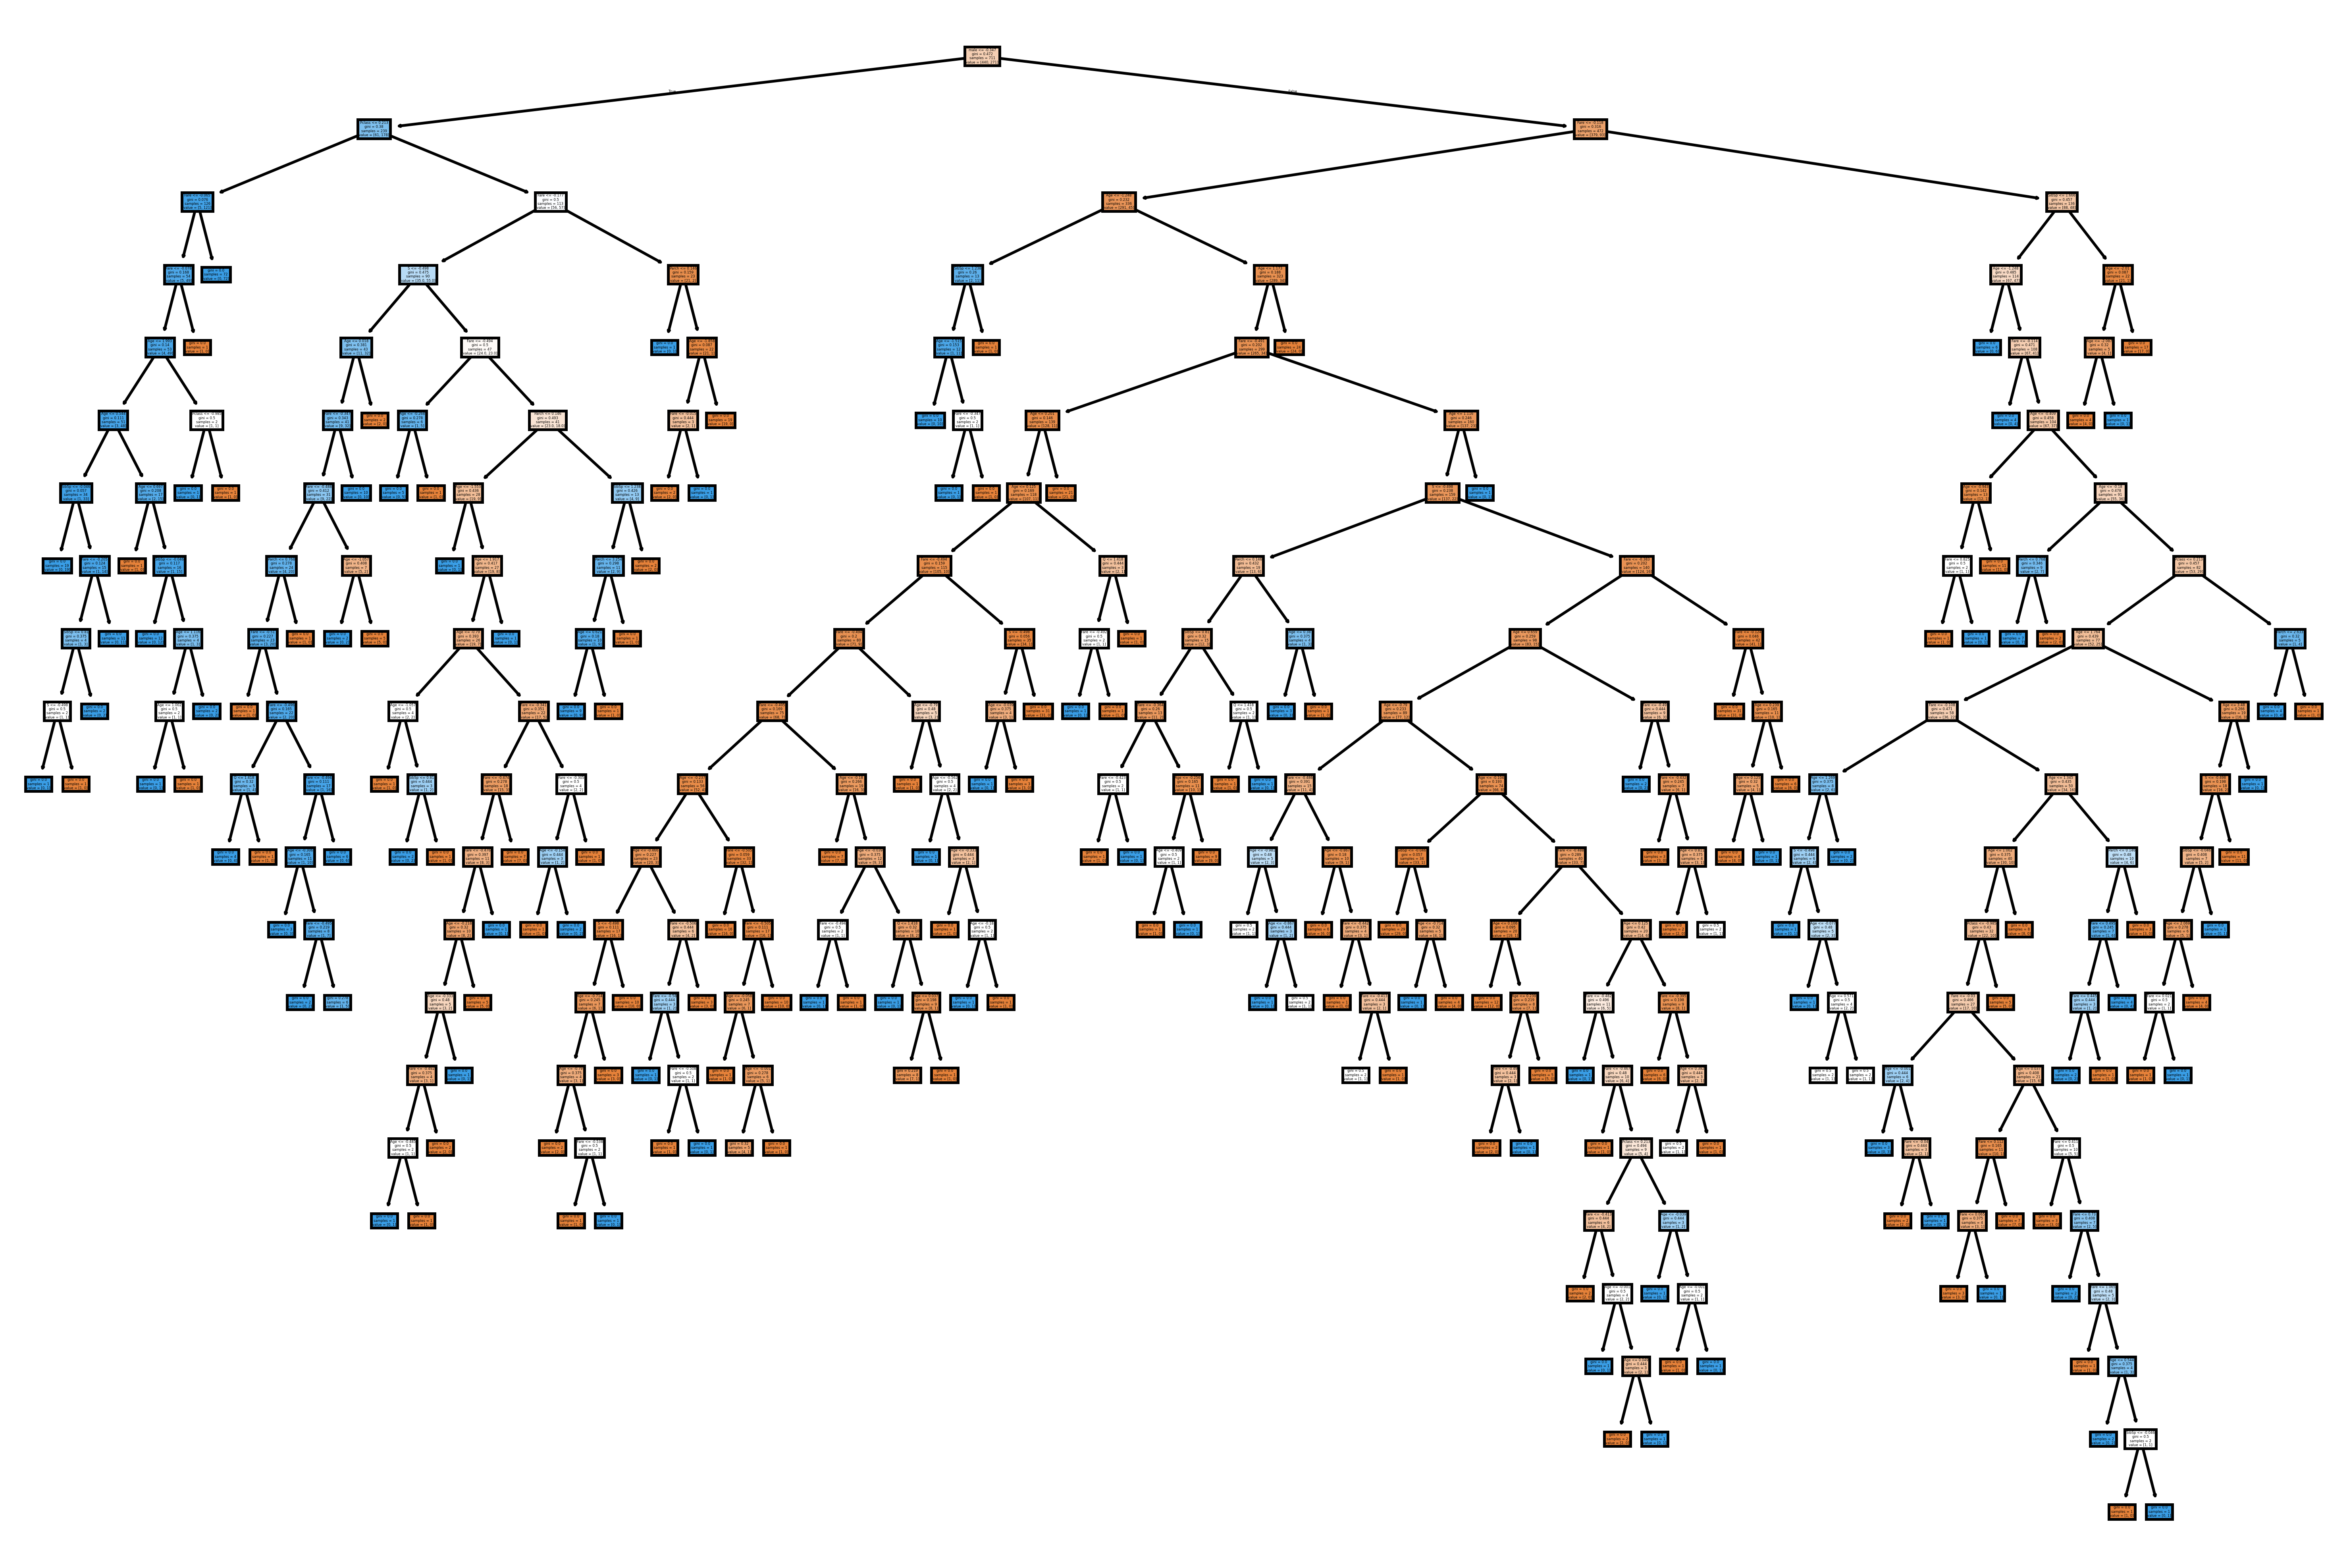

In [215]:
plt.figure(figsize = (15,10), dpi=500)
plot_tree(dtree, filled = True, feature_names=X.columns)
plt.show()

# Getting Important features

In [231]:
pd.DataFrame(index = X.columns, data=dtree.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

,Feature Importance
male,0.294378
Age,0.257325
Fare,0.227153
Pclass,0.091177
Parch,0.051994
SibSp,0.043321
S,0.021184
Q,0.013468


# Grid Search
- Applying Pruning By Setting Parameters Using GridSearch Method
- We will control these parameters

- max_depth: maximum depth of decision tree

- min_samples_leaf: The minimum number of samples required to be at a leaf node.


In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

k = 5
cv = KFold(n_splits=k, shuffle = True)
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_leaf': [1,2,3,4,5],
         'criterion': ['gini', 'entropy']}

DTGS = DecisionTreeClassifier()
gcv = GridSearchCV(DTGS, param_grid=params, cv = cv)
gcv.fit(X_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

In [218]:
model = gcv.best_estimator_

In [219]:
y_pred_cv = model.predict(X_test)

In [220]:
Accuracy = accuracy_score(y_test, y_pred_cv)
print("Accuracy:", Accuracy)

Accuracy: 0.7921348314606742


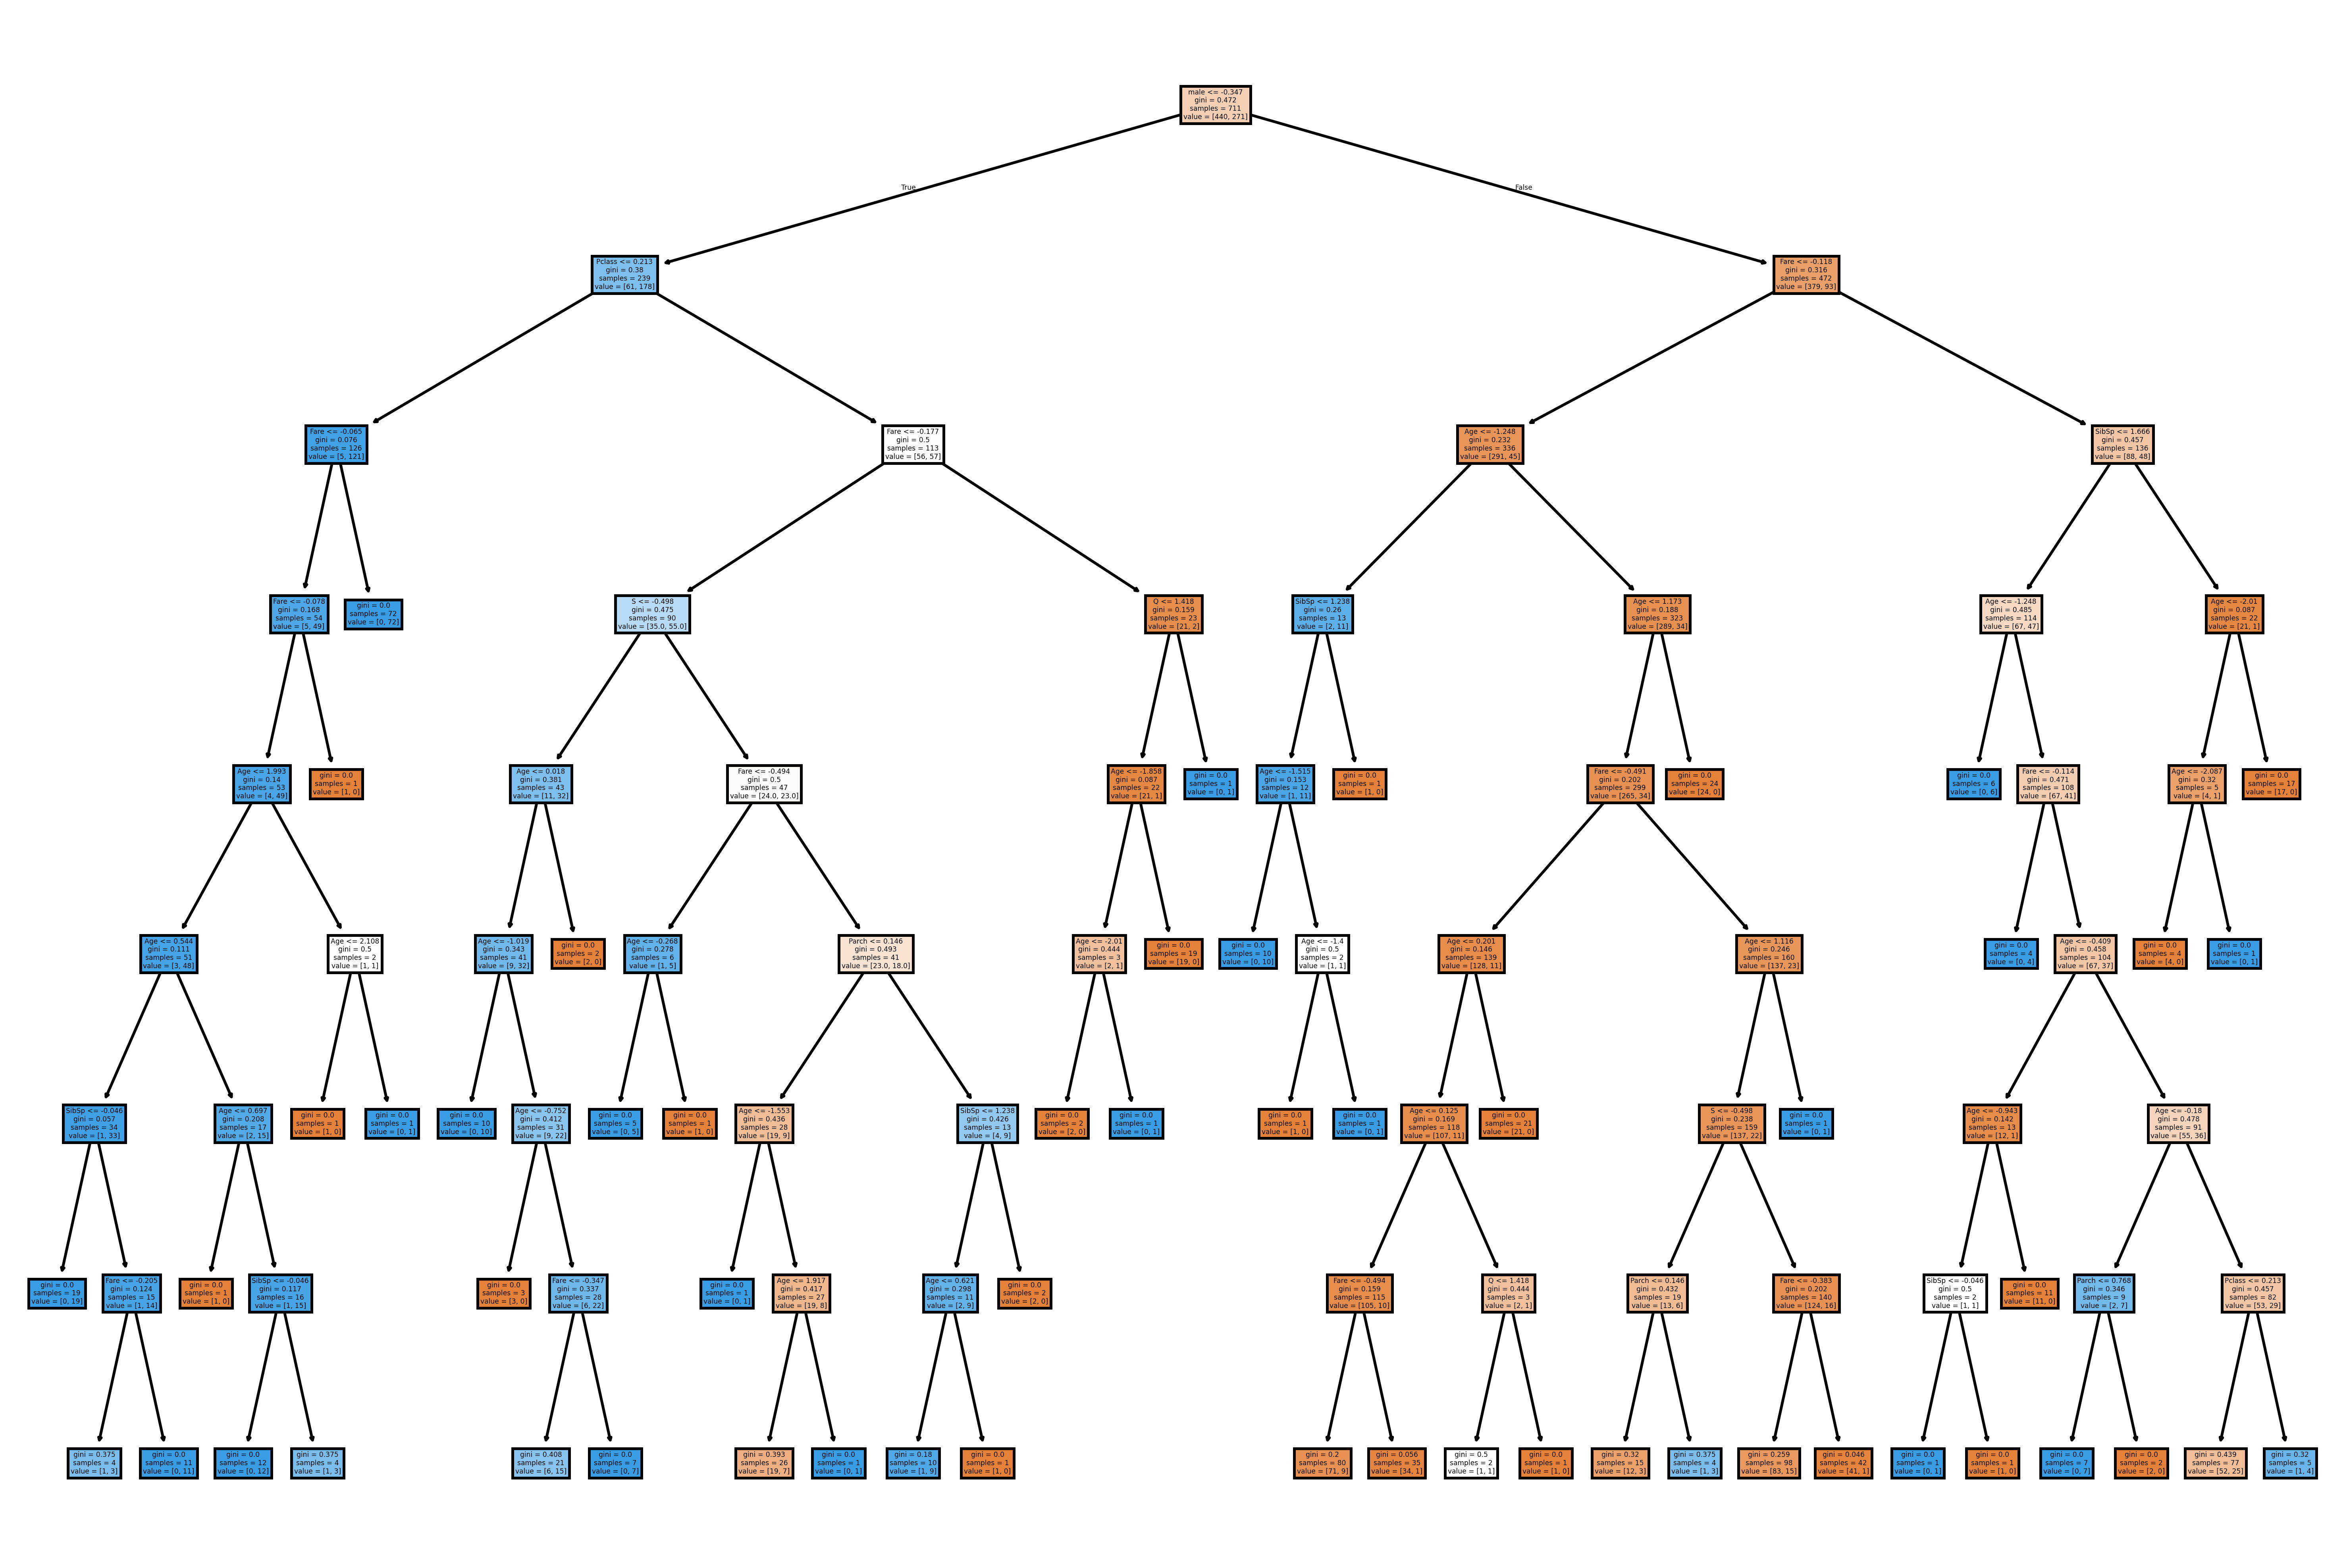

In [221]:
plt.figure(figsize = (15,10), dpi=500)
plot_tree(model, filled = True, feature_names=X.columns)
plt.show()

In [232]:
pd.DataFrame(index = X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

,Feature Importance
male,0.425256
Age,0.215225
Fare,0.132021
Pclass,0.120092
SibSp,0.045694
Parch,0.033341
S,0.019096
Q,0.009275
